Вход: временные ряды (зависимости параметров системы от времени).

Выход: временные ряды, демонстрирующие выявленные аномалии в течение времени.

Цель: обнаружение аномальных режимов системы впрыска топлива с помощью методов машинного обучения.

# Сборка датасета


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
from tsaug.visualization import plot
from tsaug import TimeWarp, AddNoise, Dropout

## Визуализация периодов различных сценариев

### Нормальный сценарий

In [16]:
data_normal = pd.read_csv('sample_data/Scenario_Normal.csv')

In [24]:
NUMBER_POINTS = len(data_normal['FTL'])
LENGTH_PERIOD = NUMBER_POINTS / 10

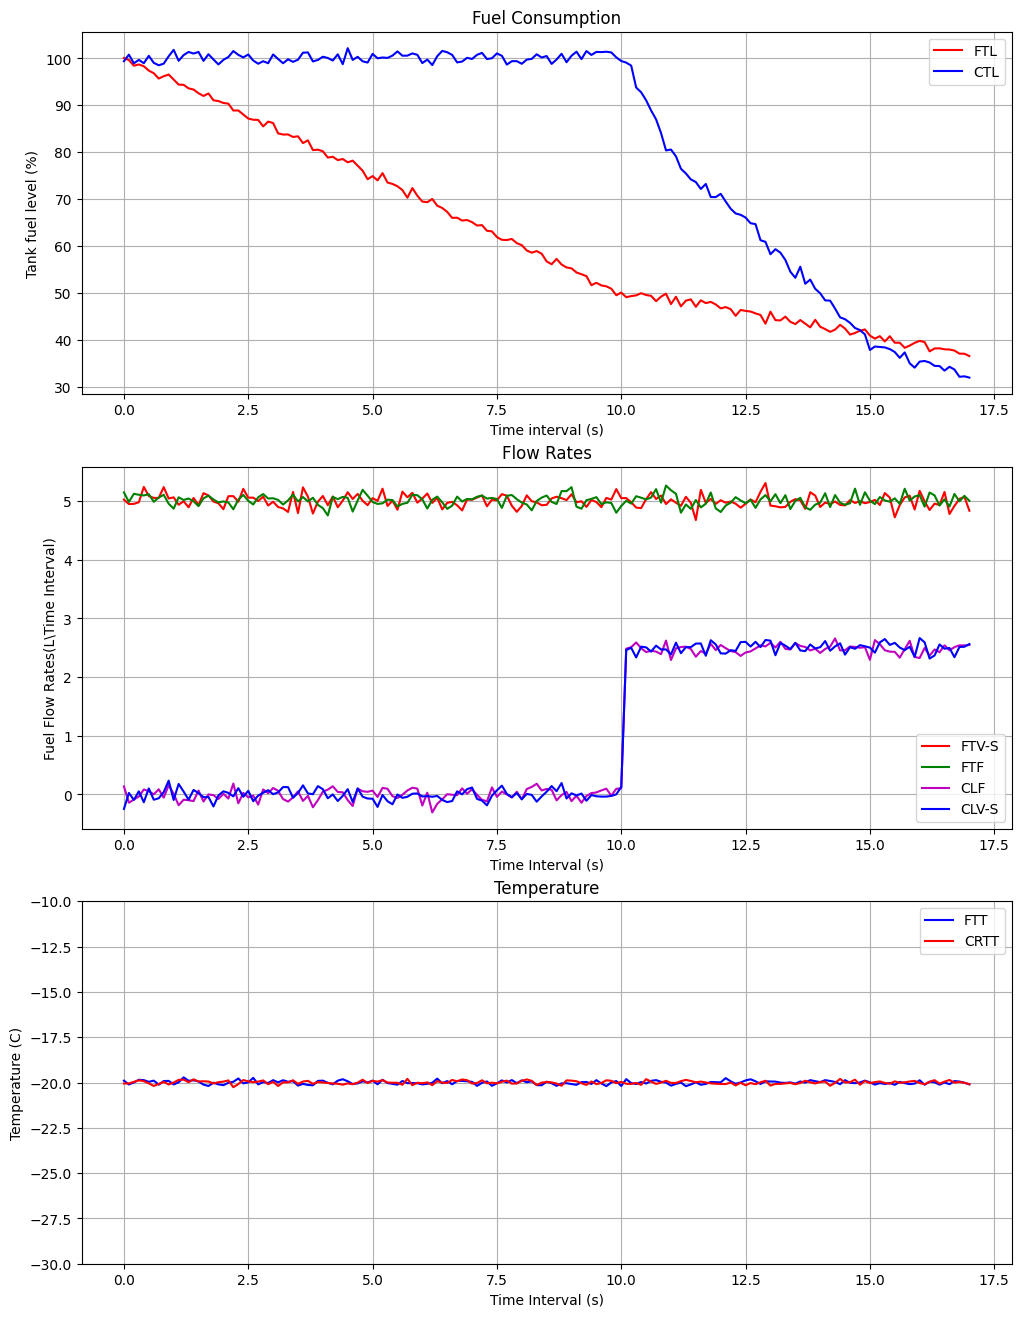

In [4]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_normal['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_normal['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_normal['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_normal['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_normal['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_normal['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_normal['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_normal['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set_ylim([-30, -10])
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 1

*Описание сценария*

In [17]:
data_1 = pd.read_csv('sample_data/Scenario_One.csv')

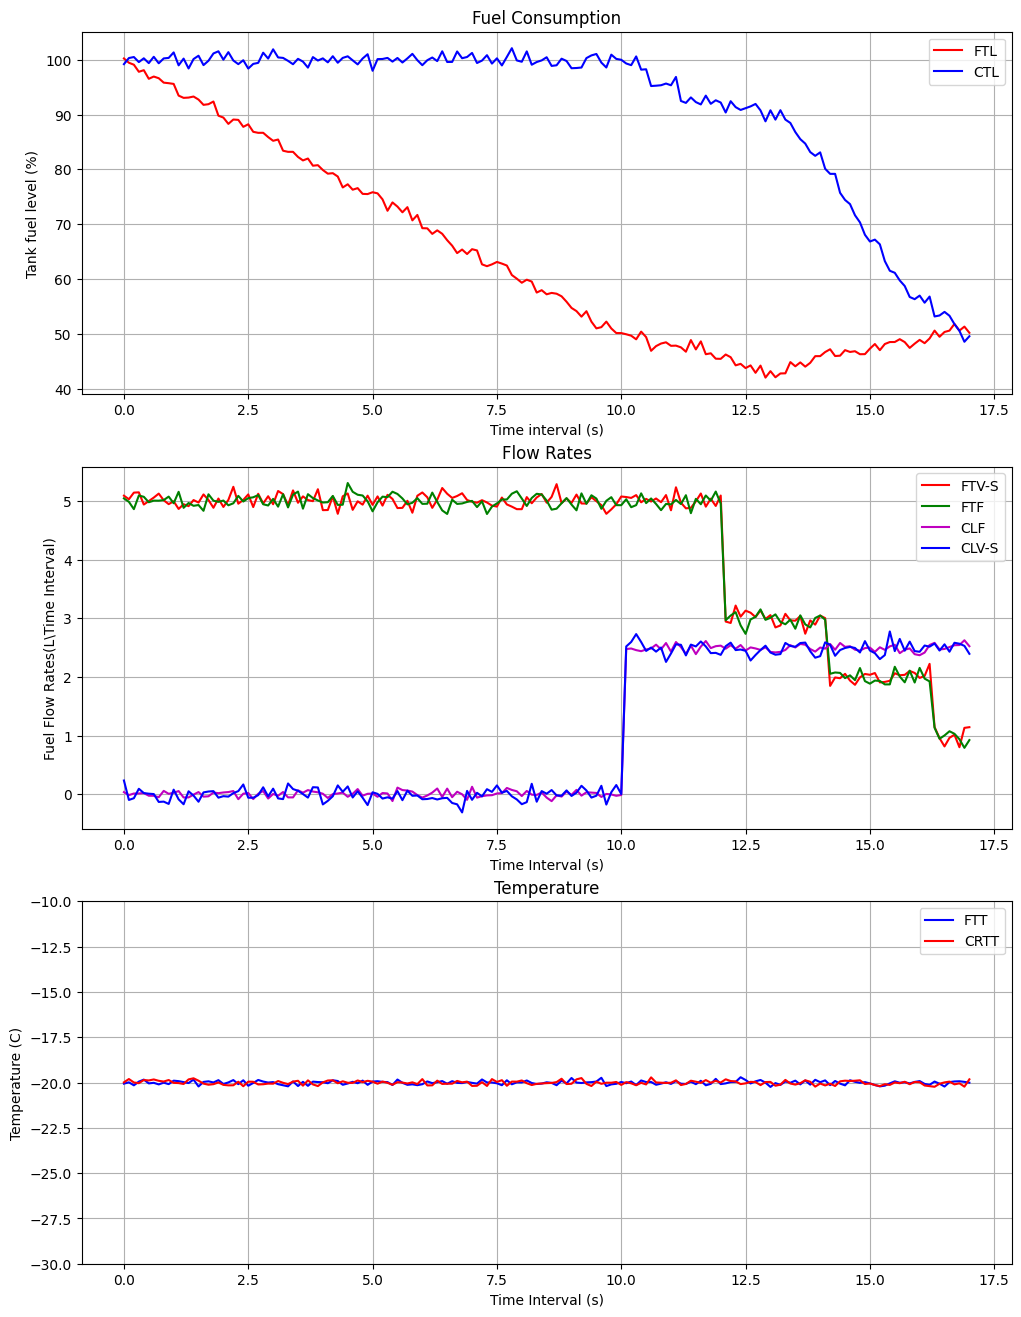

In [6]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_1['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_1['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_1['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_1['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_1['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_1['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_1['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_1['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].set_ylim([-30, -10])
axs[2].legend()
axs[2].grid()

### Сценарий 2

*Описание сценария*

In [18]:
data_2 = pd.read_csv('sample_data/Scenario_Two.csv')

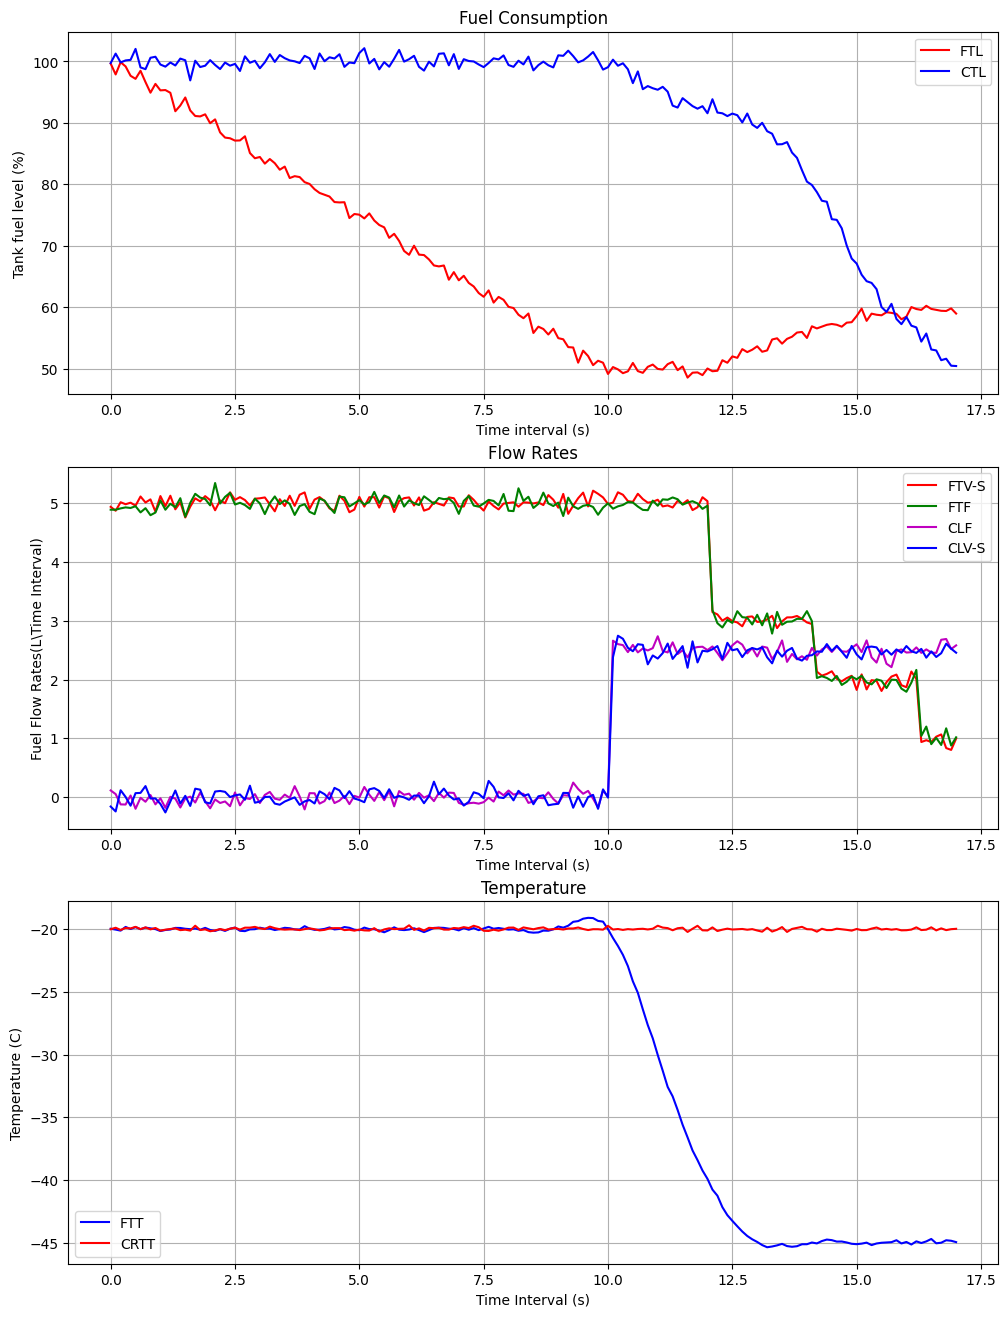

In [8]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_2['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_2['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_2['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_2['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_2['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_2['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_2['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_2['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 3

*Описание сценария*

In [19]:
data_3 = pd.read_csv('sample_data/Scenario_Three.csv')

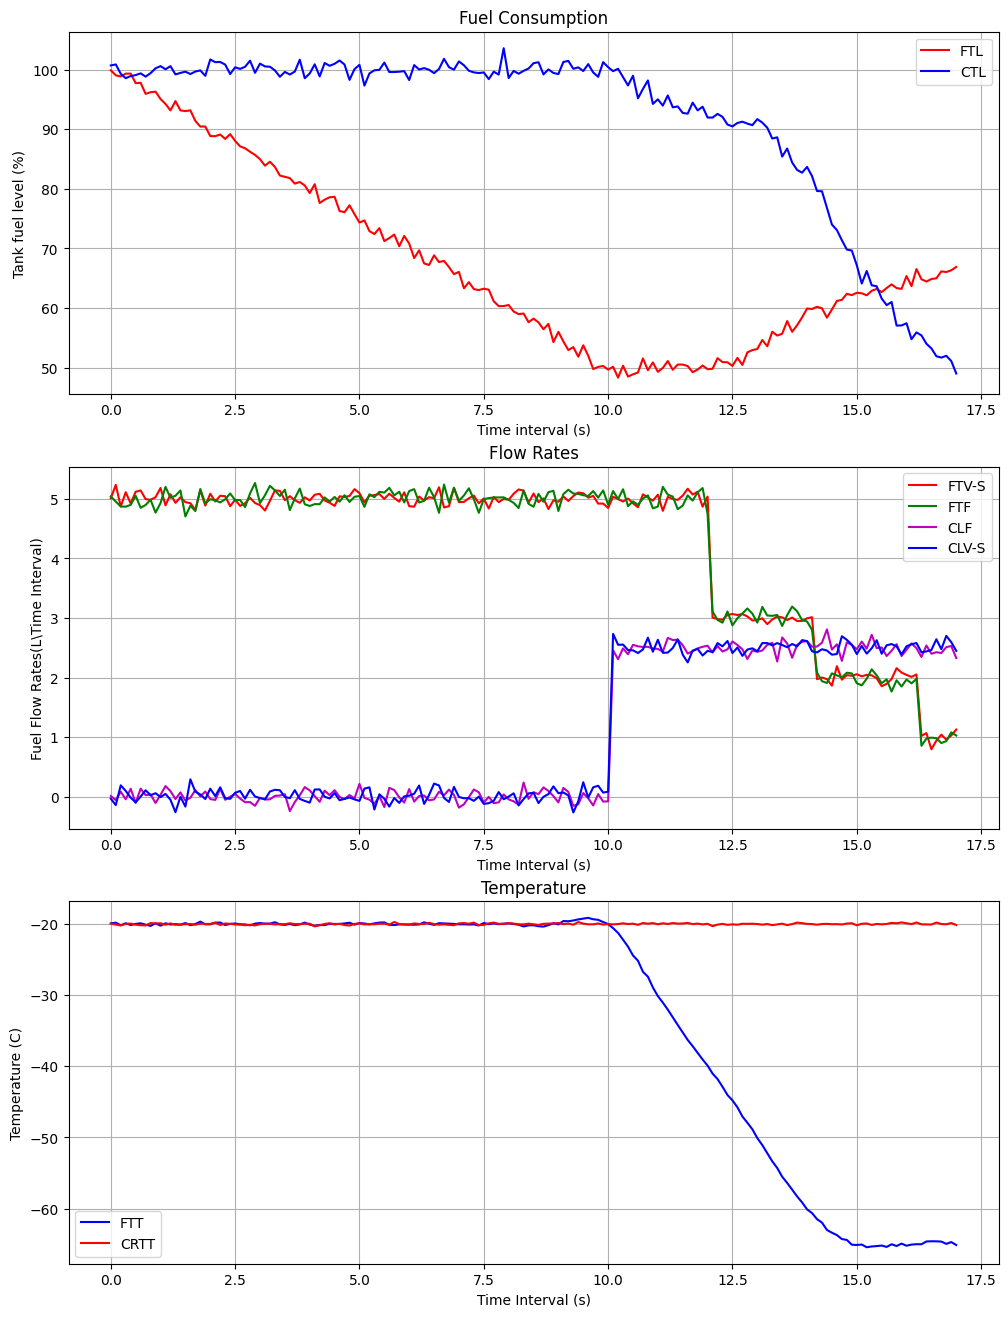

In [10]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_3['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_3['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_3['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_3['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_3['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_3['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_3['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_3['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].legend()
axs[2].grid()

### Сценарий 4

*Описание сценария*

In [20]:
data_4 = pd.read_csv('sample_data/Scenario_Four.csv')

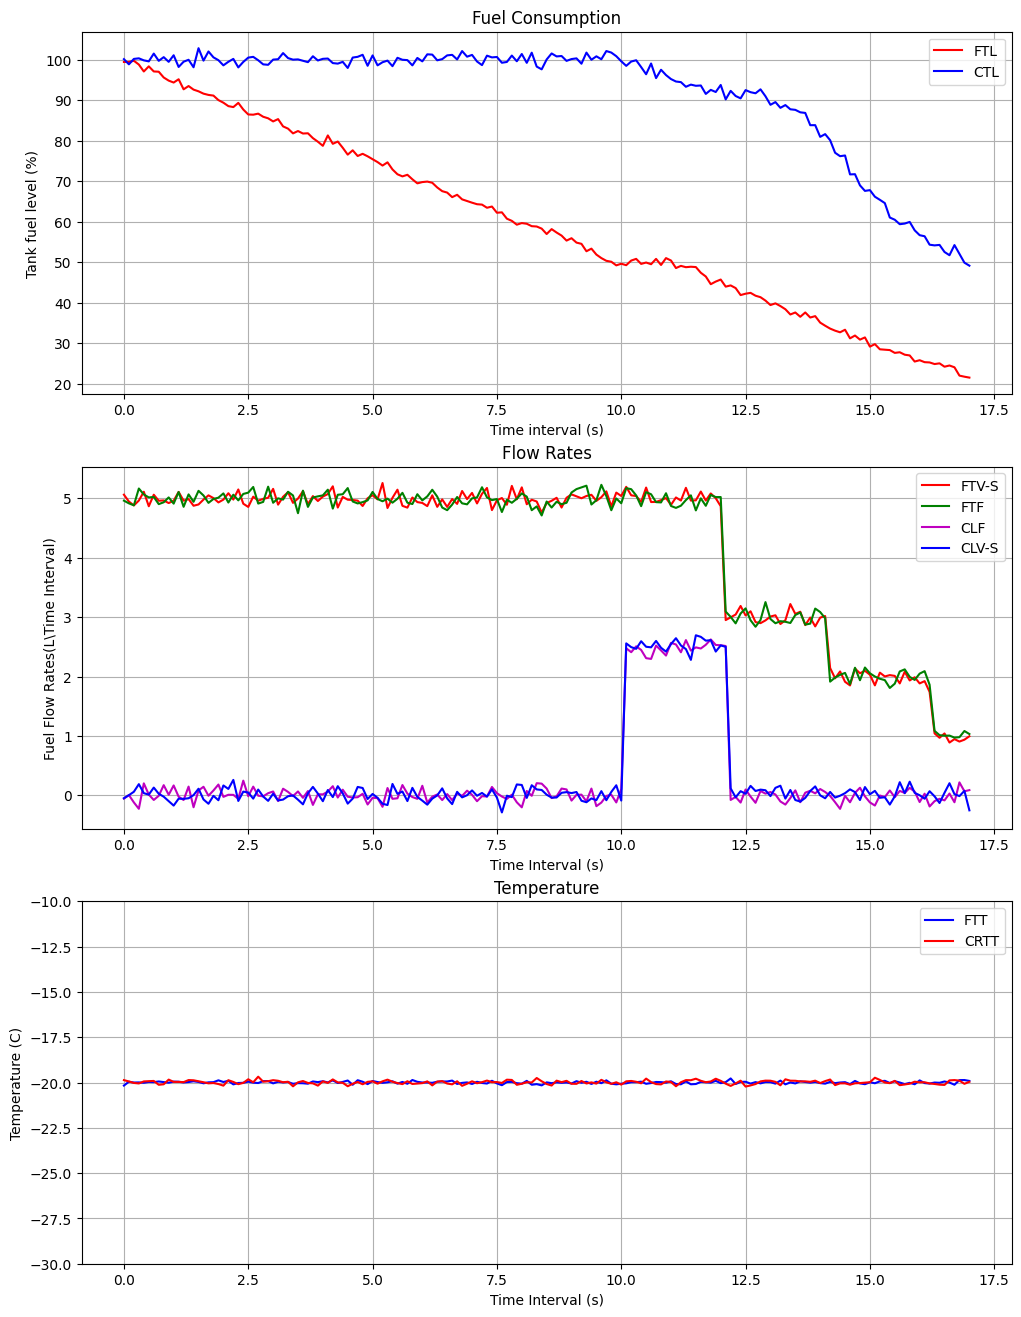

In [12]:
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex = False, sharey = False, figsize=(12, 16))

x = np.arange(0, LENGTH_PERIOD, 0.1)

axs[0].plot(x, data_4['FTL'], color='r', label = 'FTL')
axs[0].plot(x, data_4['CTL'], color='b', label = 'CTL')
axs[0].set_title('Fuel Consumption')
axs[0].set(xlabel='Time interval (s)', ylabel='Tank fuel level (%)')
axs[0].legend()
axs[0].grid()

axs[1].plot(x, data_4['FTV_S'], color='r', label = 'FTV-S')
axs[1].plot(x, data_4['FTF'], color='g', label = 'FTF')
axs[1].plot(x, data_4['CLF'], color='m', label = 'CLF')
axs[1].plot(x, data_4['CLV_S'], color='b', label = 'CLV-S')
axs[1].set_title('Flow Rates')
axs[1].set(xlabel = 'Time Interval (s)', ylabel = 'Fuel Flow Rates(L\Time Interval)')
axs[1].legend()
axs[1].grid()

axs[2].plot(x, data_4['FTT'], color='b', label = 'FTT')
axs[2].plot(x, data_4['CRTT'], color='r', label = 'CRTT')
axs[2].set_title('Temperature')
axs[2].set(xlabel = 'Time Interval (s)', ylabel = 'Temperature (C)')
axs[2].set_ylim([-30, -10])
axs[2].legend()
axs[2].grid()

## Аугментация

Создадим временной ряд из 500 периодов нормального сценария.

3/4 поместим в обучающий датасет, оставшуюся 1/4 -- в тестовый. 

Причем в тестовый набор данных будет произвольным образом вставлены 5 периодов различных аномальных сценариев.

### Нормальный сценарий

In [48]:
aug_FTL = []

aug_CTL = []

aug_FTV_S = []

aug_FTF = []

aug_CLF = []

aug_CLV_S = []

aug_FTT = []

aug_CRTT = []


augmenter = (
  TimeWarp(n_speed_change=2, max_speed_ratio=1.2)
  + Dropout(p=0.05, fill='ffill')
  + AddNoise(scale=0.005)
)

In [49]:
x = np.arange(0, 500 * LENGTH_PERIOD, 0.1)

In [50]:
for i in range(0, 500):
  cur_aug_FTL = augmenter.augment(np.array(data_normal['FTL']))
  aug_FTL = np.concatenate([aug_FTL, cur_aug_FTL])

  cur_aug_CTL = augmenter.augment(np.array(data_normal['CTL']))
  aug_CTL = np.concatenate([aug_CTL, cur_aug_CTL])

  cur_aug_FTV_S = augmenter.augment(np.array(data_normal['FTV_S']))
  aug_FTV_S = np.concatenate([aug_FTV_S, cur_aug_FTV_S])

  cur_aug_FTF = augmenter.augment(np.array(data_normal['FTF']))
  aug_FTF = np.concatenate([aug_FTF, cur_aug_FTF])

  cur_aug_CLF = augmenter.augment(np.array(data_normal['CLF']))
  aug_CLF = np.concatenate([aug_CLF, cur_aug_CLF])

  cur_aug_CLV_S = augmenter.augment(np.array(data_normal['CLV_S']))
  aug_CLV_S = np.concatenate([aug_CLV_S, cur_aug_CLV_S])

  cur_aug_FTT = augmenter.augment(np.array(data_normal['FTT']))
  aug_FTT = np.concatenate([aug_FTT, cur_aug_FTT])

  cur_aug_CRTT = augmenter.augment(np.array(data_normal['CRTT']))
  aug_CRTT = np.concatenate([aug_CRTT, cur_aug_CRTT])

Введем тип сценария: 0 - нормальный, ненулевые - аномальные.

In [51]:
type = [0 for i in range(500 * NUMBER_POINTS)]

In [52]:
df_train = pd.DataFrame({'time': x[0:375 * NUMBER_POINTS],'FTL': aug_FTL[0:375 * NUMBER_POINTS], 'CTL': aug_CTL[0:375 * NUMBER_POINTS], 'FTV_S': aug_FTV_S[0:375 * NUMBER_POINTS], 'FTF': aug_FTF[0:375 * NUMBER_POINTS], 'CLF': aug_CLF[0:375 * NUMBER_POINTS], 'CLV_S': aug_CLV_S[0:375 * NUMBER_POINTS],'FTT': aug_FTT[0:375 * NUMBER_POINTS], 'CRTT': aug_CRTT[0:375 * NUMBER_POINTS],'type': type[0:375 * NUMBER_POINTS]})
df_train.to_csv('augmented_data/training_dataset.csv', index = False)

df_test_normal = pd.DataFrame({'time': x[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'FTL': aug_FTL[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CTL': aug_CTL[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'FTV_S': aug_FTV_S[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'FTF': aug_FTF[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CLF': aug_CLF[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CLV_S': aug_CLV_S[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'FTT': aug_FTT[375 * NUMBER_POINTS:500 * NUMBER_POINTS], 'CRTT': aug_CRTT[375 * NUMBER_POINTS:500 * NUMBER_POINTS],'type': type[375 * NUMBER_POINTS:500 * NUMBER_POINTS]})

### Аномальные сценарии